## Read and Write files

In [17]:
file = open("testfile.txt","w")             #Careful with writing as it deletes the old file
 
file.write("Hello World \n") 
file.write("This is our new text file \n") 
file.write("and this is another line. \n") 
file.write("Why? Because we can.") 
 
file.close() 

In [2]:
%ls

Clase_1.ipynb    Cosmo_MCTP/      Untitled1.ipynb  test.py
Clase_1.key*     Loerntz_ex.py    data/            testfile.txt
Clase_2.ipynb    Palabras.py      figures/
Clase_3.ipynb    Tareas/          hola.txt
Clase_4.ipynb    Untitled.ipynb   python_cinves/


Mode 	Description
'r' 	Open a file for reading. (default)

'w' 	Open a file for writing. Creates a new file if it does not exist or truncates the file if it exists.

'x' 	Open a file for exclusive creation. If the file already exists, the operation fails.

'a' 	Open for appending at the end of the file without truncating it. Creates a new file if it does not exist.

't' 	Open in text mode. (default)

'b' 	Open in binary mode.

'+' 	Open a file for updating (reading and writing)

In [26]:
file2 = open('testfile.txt', 'r')

In [19]:
file2.read()

'Hello World \nThis is our new text file \nand this is another line. \nWhy? Because we can.'

In [22]:
file2.readlines()

['Hello World \n',
 'This is our new text file \n',
 'and this is another line. \n',
 'Why? Because we can.']

In [23]:
file2.readline(3)

''

In [27]:
for line in file2.readlines():
    print line

Hello World 

This is our new text file 

and this is another line. 

Why? Because we can.


In [30]:
with open("test.txt",'w') as f:
    f.write("my first file\n")
    f.write("This file\n\n")
    f.write("contains three lines\n")

In [31]:
%ls

Clase_1.ipynb    Cosmo_MCTP/      Untitled1.ipynb  test.py
Clase_1.key*     Loerntz_ex.py    data/            test.txt
Clase_2.ipynb    Palabras.py      figures/         testfile.txt
Clase_3.ipynb    Tareas/          hola.txt
Clase_4.ipynb    Untitled.ipynb   python_cinves/


In [32]:
%cat test.txt

my first file
This file

contains three lines


In [84]:
cmb = open('data/CMB_spectrum.txt', 'r') 

ll = []
SS = []
for i, line in enumerate(cmb.readlines()):
    if i > 2: 
        l, _, _, S, _ = line.split()
        ll.append(float(l))
        SS.append(float(S)) 
cmb.close()

## csv
Comma Separated Values

In [61]:
import csv

In [74]:
with open('data/Investing.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        print row
        date = row[0]
        stock  = row[1]
        price  = float(row[2])

['01/04/2016', 'APPL', '98000']
['01/07/2016', 'MSFT', '100000']
['01/08/2016', 'FB', '100000']
['01/11/2016', 'AAPL', '101500']
['01/12/201', '6FB', '101500']
['01/13/2016', 'MSFT', '101500']


## Dates and times

In [214]:
from datetime import datetime, date, time, timedelta

In [194]:
dt =  datetime(2011, 10, 29, 20, 30, 21)
dt

datetime.datetime(2011, 10, 29, 20, 30, 21)

In [195]:
dt.day, dt.minute

(29, 30)

In [196]:
dt.date(), dt.time()

(datetime.date(2011, 10, 29), datetime.time(20, 30, 21))

In [197]:
# Format a datetime as a string
dt.strftime('%m/%d/%Y %H:%M')

'10/29/2011 20:30'

In [198]:
# Strings can be converted (parsed) into datetime object
datetime.strptime('20091031', '%Y%m%d')

datetime.datetime(2009, 10, 31, 0, 0)

In [199]:
#replace fields of a series of datetimes
dt.replace(minute = 0, second= 0)

datetime.datetime(2011, 10, 29, 20, 0)

In [200]:
#Take the difference of two datetime objects
dt2 = datetime(2011, 11, 15, 22, 30)

delta = dt2 - dt
print delta

17 days, 1:59:39


In [201]:
datetime.today()

datetime.datetime(2019, 2, 7, 9, 15, 8, 819374)

In [202]:
hoy = datetime.today()

In [210]:
hoy.year  - datetime(1982, 9, 6).year

37

In [211]:
t1 = date(year = 2018, month = 7, day = 12)
t2 = date(year = 2017, month = 12, day = 23)
t3 = t1 - t2
print("t3 =", t3)

('t3 =', datetime.timedelta(201))


In [218]:
t4 = datetime(year = 2018, month = 7, day = 12, hour = 7, minute = 9, second = 33)
t5 = datetime(year = 2019, month = 6, day = 10, hour = 5, minute = 55, second = 13)
t6 = t5 - t4
print("t6 =", t6)

('t6 =', datetime.timedelta(332, 81940))


In [221]:
t6.total_seconds()*60

1726004400.0

In [215]:
t = timedelta(days = 5, hours = 1, seconds = 33, microseconds = 233423)
print("total seconds =", t.total_seconds())

('total seconds =', 435633.233423)


### adelanto de pandas

In [75]:
import pandas as pd

In [80]:
PLK = pd.read_table('data/CMB_spectrum.txt', sep='\s+', skiprows=[1,2], nrows=20)
PLK.head(5)

,ELL,LMIN,LMAX,D_ELL,ERR
0,47.711,30,59,1487.252,51.307
1,76.472,60,89,2042.918,55.064
2,105.917,90,119,2960.235,65.335
3,135.605,120,149,3868.376,77.296
4,165.406,150,179,4886.579,86.968


In [81]:
PLK['ELL']

0      47.711
1      76.472
2     105.917
3     135.605
4     165.406
5     195.267
6     225.165
7     255.087
8     285.025
9     314.975
10    344.934
11    374.899
12    404.870
13    434.844
14    464.822
15    494.803
16    524.785
17    554.770
18    584.756
19    614.744
Name: ELL, dtype: float64

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

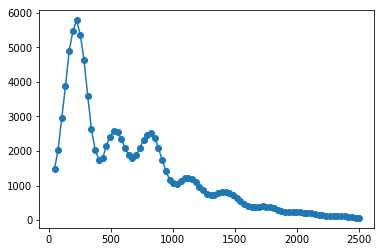

In [94]:
plt.plot(ll, SS,  marker='o' )

# Basic plotting

In [95]:
lista1 = [11,2,3,15,8,13,21,34] 

Text(0,0.5,'ordenada')

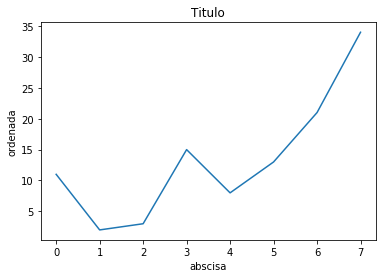

In [100]:
plt.plot(lista1) 
plt.title("Titulo")   # Establece el título del gráfico
plt.xlabel("abscisa")   # Establece el título del eje x 
plt.ylabel("ordenada")   # Establece el título del eje y

In [101]:
lista2 = [2,3,4,2,3,6,4,10] 

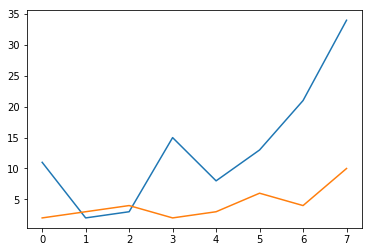

In [103]:
plt.plot(lista1)
plt.plot(lista2)

In [107]:
x = np.linspace(0, 5, 10)
y = x**2

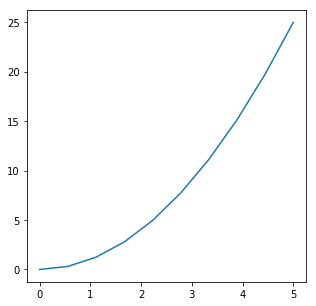

In [108]:
plt.figure(figsize=(5,5)) #Tamaño de la figura
plt.plot(x, y)

## Colores y formas

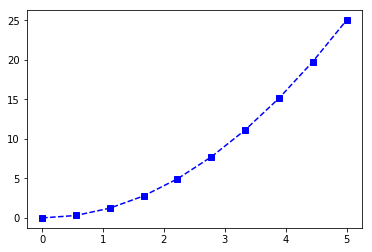

In [121]:
plt.plot(x, x**2, color='b', marker='s', linestyle='--')
help(plt.plot)

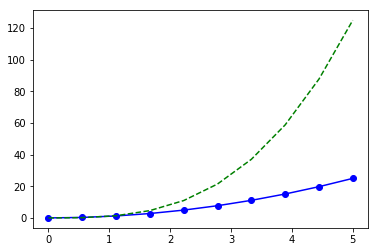

In [122]:
plt.plot(x, x**2, 'bo-') # blue line with dots
plt.plot(x, x**3, 'g--') # green dashed line

## Lines and makers

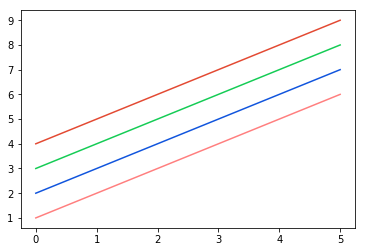

In [123]:
plt.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
plt.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
plt.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color
plt.plot(x, x+4, color='#e34a33')

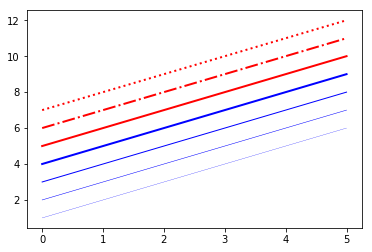

In [126]:
plt.plot(x, x+1, color="blue", linewidth=0.25)
plt.plot(x, x+2, color="blue", linewidth=0.50)
plt.plot(x, x+3, color="blue", linewidth=1.00)
plt.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
plt.plot(x, x+5, color="red", lw=2, linestyle='-')
plt.plot(x, x+6, color="red", lw=2, ls='-.')
plt.plot(x, x+7, color="red", lw=2, ls=':')

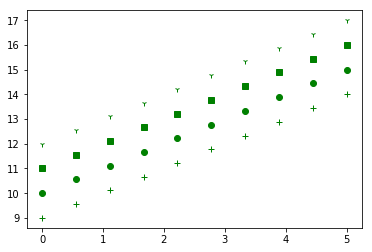

In [127]:
# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
plt.plot(x, x+ 9, color="green", lw=2, ls='', marker='+')
plt.plot(x, x+10, color="green", lw=2, ls='', marker='o')
plt.plot(x, x+11, color="green", lw=2, ls='', marker='s')
plt.plot(x, x+12, color="green", lw=2, ls='', marker='1')

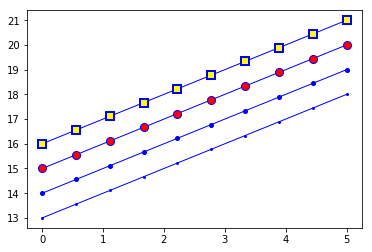

In [128]:
# marker size and color
plt.plot(x, x+13, color="blue", lw=1, ls='-', marker='o', markersize=2)
plt.plot(x, x+14, color="blue", lw=1, ls='-', marker='o', markersize=4)
plt.plot(x, x+15, color="blue", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
plt.plot(x, x+16, color="blue", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

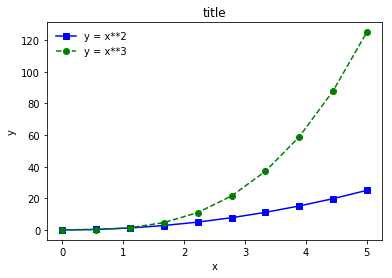

In [132]:
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b-',marker='s', label="y = x**2")
ax.plot(x, x**3,'g--',marker='o', label="y = x**3")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
ax.legend(loc=2, frameon=False)

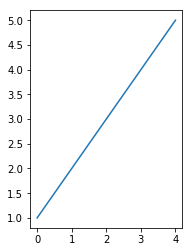

In [130]:
plt.subplot(1,2,1) #Se divide la ventana en 1 fila y 2 columnas
plt.plot((1,2,3,4,5)) #Estos son valores de y, python genera los valores de x

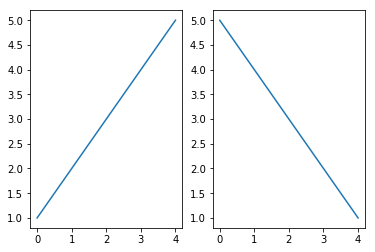

In [131]:
plt.subplot(1,2,1) #Se divide la ventana en 1 fila y 2 columnas
plt.plot((1,2,3,4,5)) #Estos son valores de y, python genera los valores de x
plt.subplot(1,2,2) #Se selecciona la otra mitad
plt.plot((5,4,3,2,1))

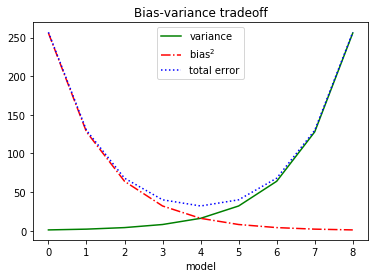

In [149]:
variance = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]
total_error = [x+y for x,y in zip(variance, bias_squared)]
xs = [i for i,_ in enumerate(variance)]

plt.plot(xs, variance,     'g-' , label = 'variance')           #select line style
plt.plot(xs, bias_squared, 'r-.', label = 'bias$^2$')           #accepts Latex syntaxis
plt.plot(xs, total_error,  'b:' , label = 'total error')

plt.legend(loc = 'upper center')                                #legend location
plt.xlabel('model')
plt.title('Bias-variance tradeoff')
plt.show()

# Otras graficas

### Bar charts

In [133]:
movies = ['Annie Hall', 'Ben-Hur', 'Casablanca', 'Gandhi']
num_oscars = [5, 11, 3, 8]
xs = [i + 0.1 for i,_ in enumerate(movies)]

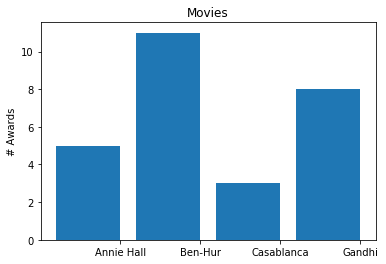

In [134]:
plt.bar(xs, num_oscars)
plt.xticks([i + 0.5 for i,_ in enumerate(movies)], movies)
plt.ylabel('# Awards')
plt.title('Movies')
plt.show()

## Histogram

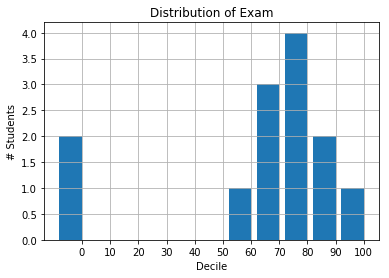

In [146]:
from collections import Counter

grades  = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10*10                   #range of 10

histogram = Counter(decile(grade) for grade in grades)
plt.bar([x - 4 for x in histogram.keys()], histogram.values(), width = 8)   #width of the bar
plt.grid()
plt.xticks([10*i for i in range(11)])
plt.xlabel('Decile')
plt.ylabel('# Students')
plt.title('Distribution of Exam')
plt.show()

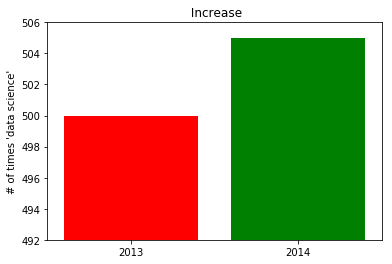

In [147]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2013, 2014], mentions, width = 0.8, color =['red','green'])
plt.xticks(years)
plt.ylabel("# of times 'data science'")

#plt.ticklabel_format(useOffset = False)                   # off in the corner
plt.axis([2012.5 ,2014.5, 492, 506])                       #limits on axis

plt.title(' Increase')
plt.show()

### Scatter plots

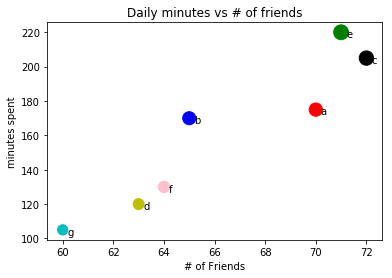

In [170]:
friends = [70, 65, 72, 63, 71, 64, 60]
minutes = [175, 170, 205, 120, 220, 130, 105]
colors = ['r', 'b', 'k', 'y', 'g', 'pink', 'c']
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

plt.scatter(friends, minutes, s =[2*minutes], color=[i for i in colors])                            #size of the marker

for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,                                         #add text to the plot
                xy = (friend_count, minute_count),              #label position
                xytext = (5, -5),                               #but slightly offset    
                textcoords = 'offset points')
    
plt.title('Daily minutes vs # of friends')
plt.xlabel('# of Friends')
plt.ylabel('minutes spent')
plt.show()

## Figures and subplots

In [180]:
from numpy.random import randn
import matplotlib

matplotlib.style.use('ggplot')

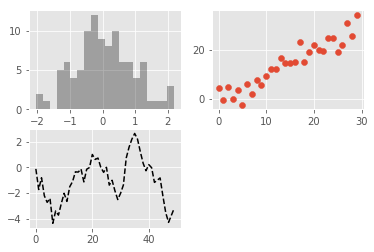

In [181]:


fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)


plt.plot(randn(50).cumsum(), 'k--')
_ =ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+ 3*randn(30))


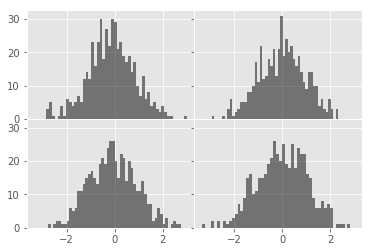

In [182]:
fig, axes =plt.subplots(2, 2, sharex = True, sharey= True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

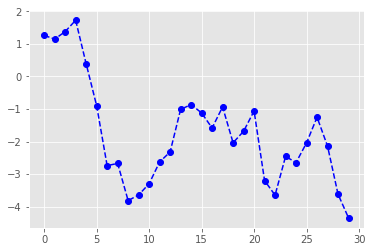

In [183]:
plt.plot(randn(30).cumsum(), color='b', linestyle='dashed', marker='o')

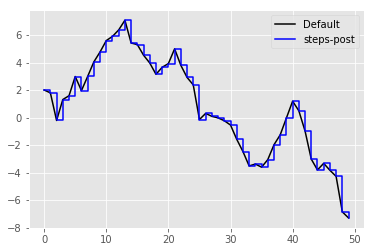

In [184]:
#draw style

data = randn(50).cumsum()
plt.plot(data, label='Default', color='k')
plt.plot(data,  drawstyle= 'steps-post', label='steps-post', color='b')
plt.legend(loc= 'best')



### Ticks, labels and legends

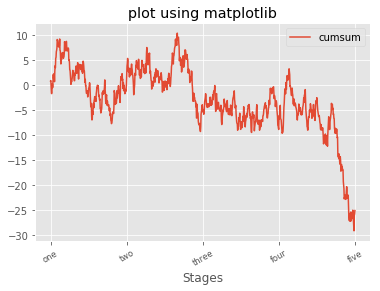

In [185]:

fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), label='cumsum')
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
ax.set_title('plot using matplotlib')
ax.set_xlabel('Stages')
ax.legend(loc='best')       #or plt.legend

### Annotations and drawing

In [186]:
from datetime import datetime

Text(0.5,1,'Financial crisis')

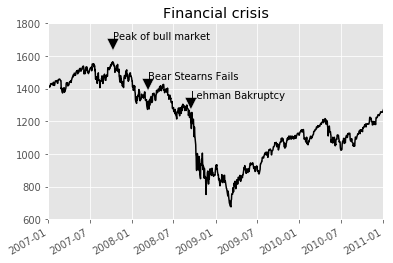

In [188]:
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)
spx  = data['SPX']
spx.plot(ax = ax, style='k-')

crisis_data = [
                (datetime(2007, 10, 11), 'Peak of bull market'),
                (datetime(2008, 3,  12), 'Bear Stearns Fails'), 
                (datetime(2008, 9,  15), 'Lehman Bakruptcy')]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+80),
                   xytext= (date, spx.asof(date)+200),
                   arrowprops = dict(facecolor='black'),
                   horizontalalignment = 'left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Financial crisis')


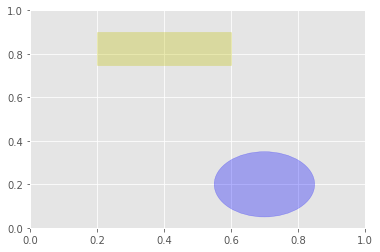

In [189]:
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, .75), 0.4, 0.15, color='y', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)

ax.add_patch(rect)
ax.add_patch(circ)

#dpi = dots per inch
#bbox_inches = trim the whitespace
#plt.savefig('name.pdf', dpi=400, bbox_inches='tight')  

In [190]:
from IPython.display import Image

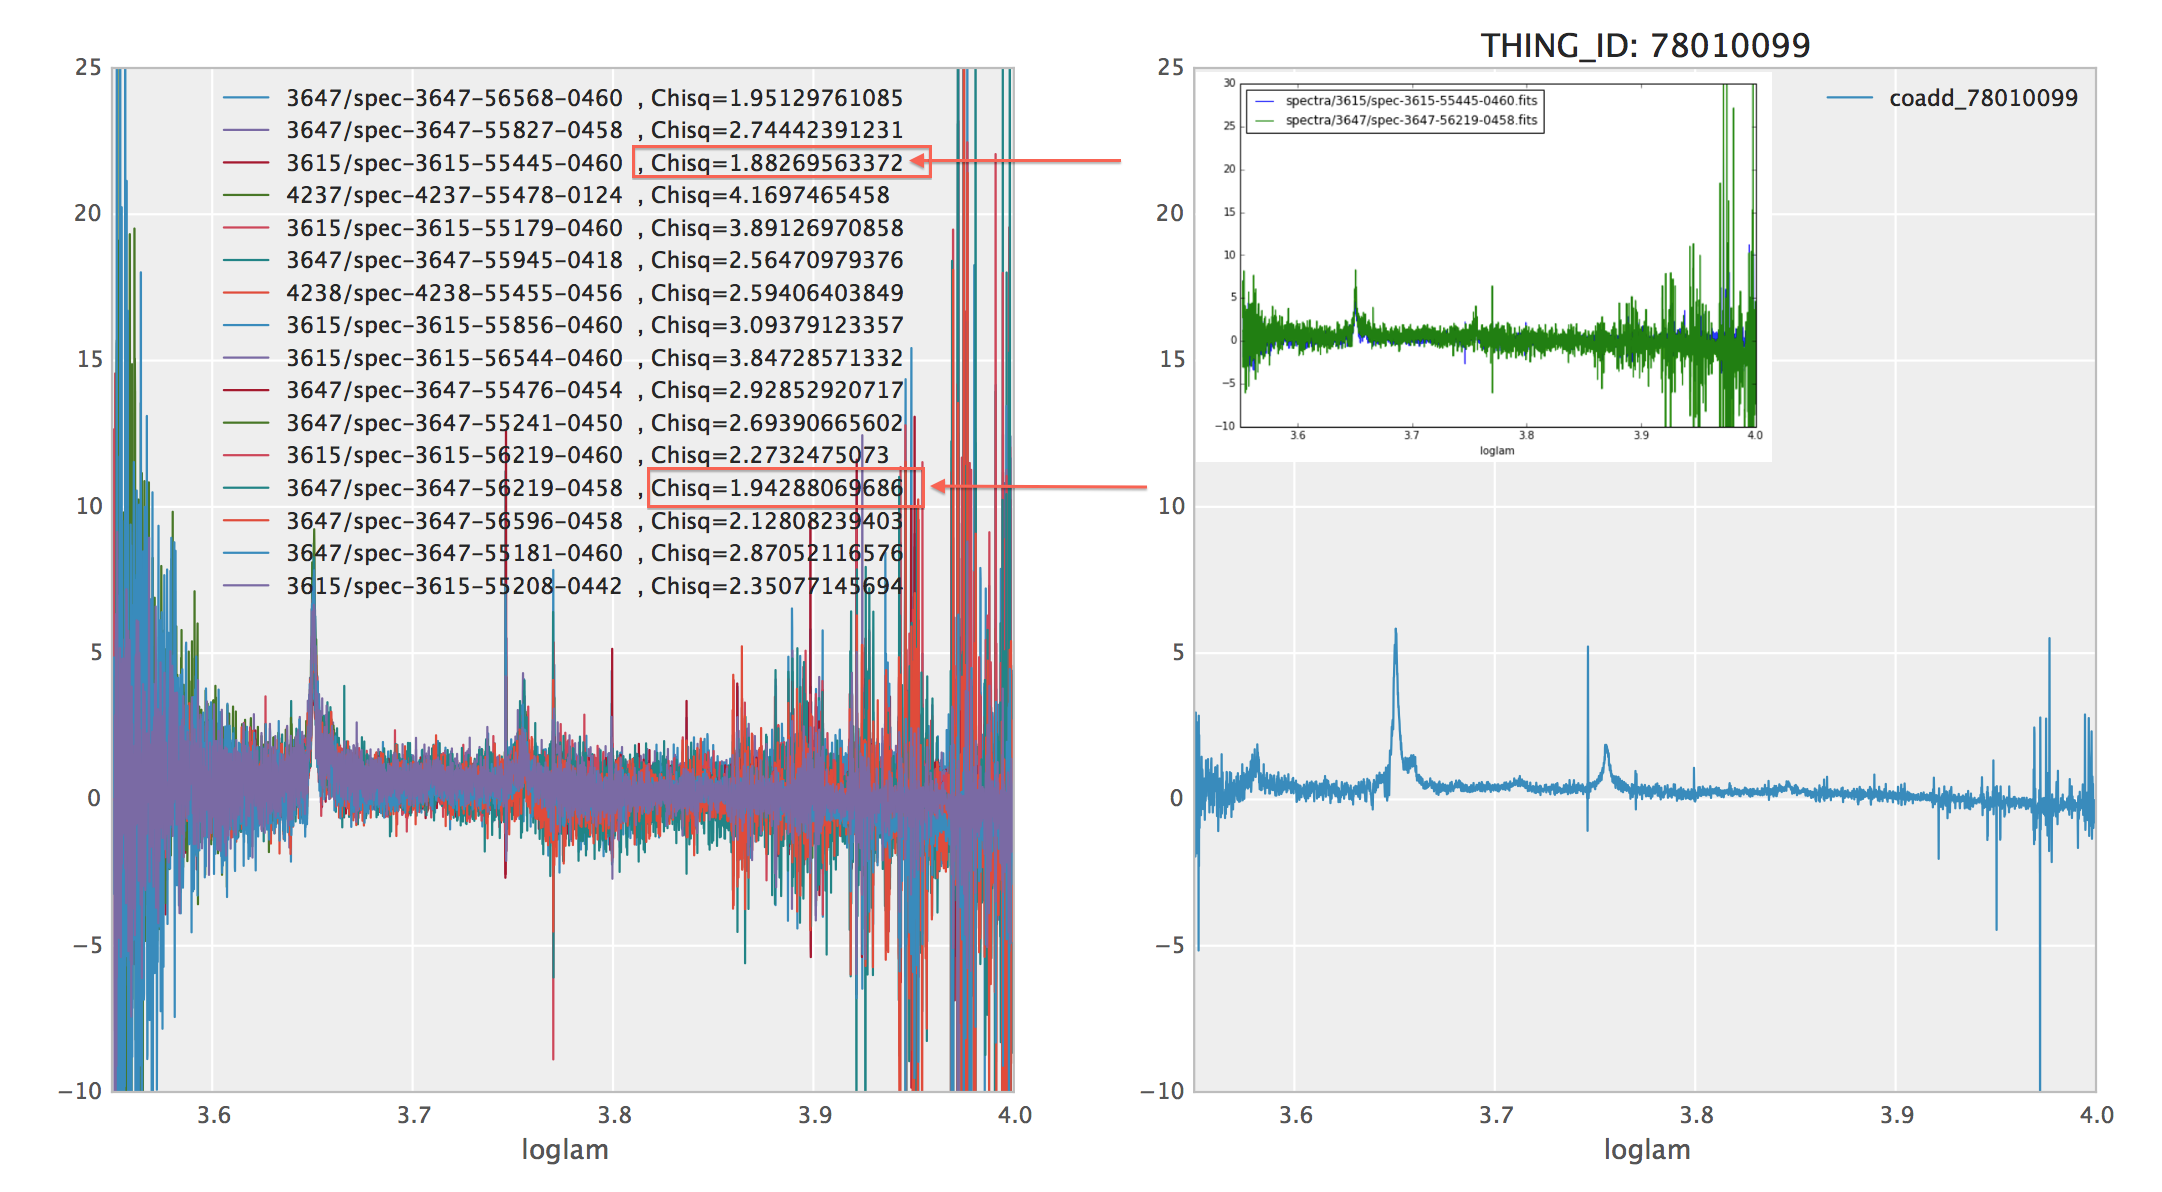

In [191]:
Image("data/THING_ID_4.jpg")

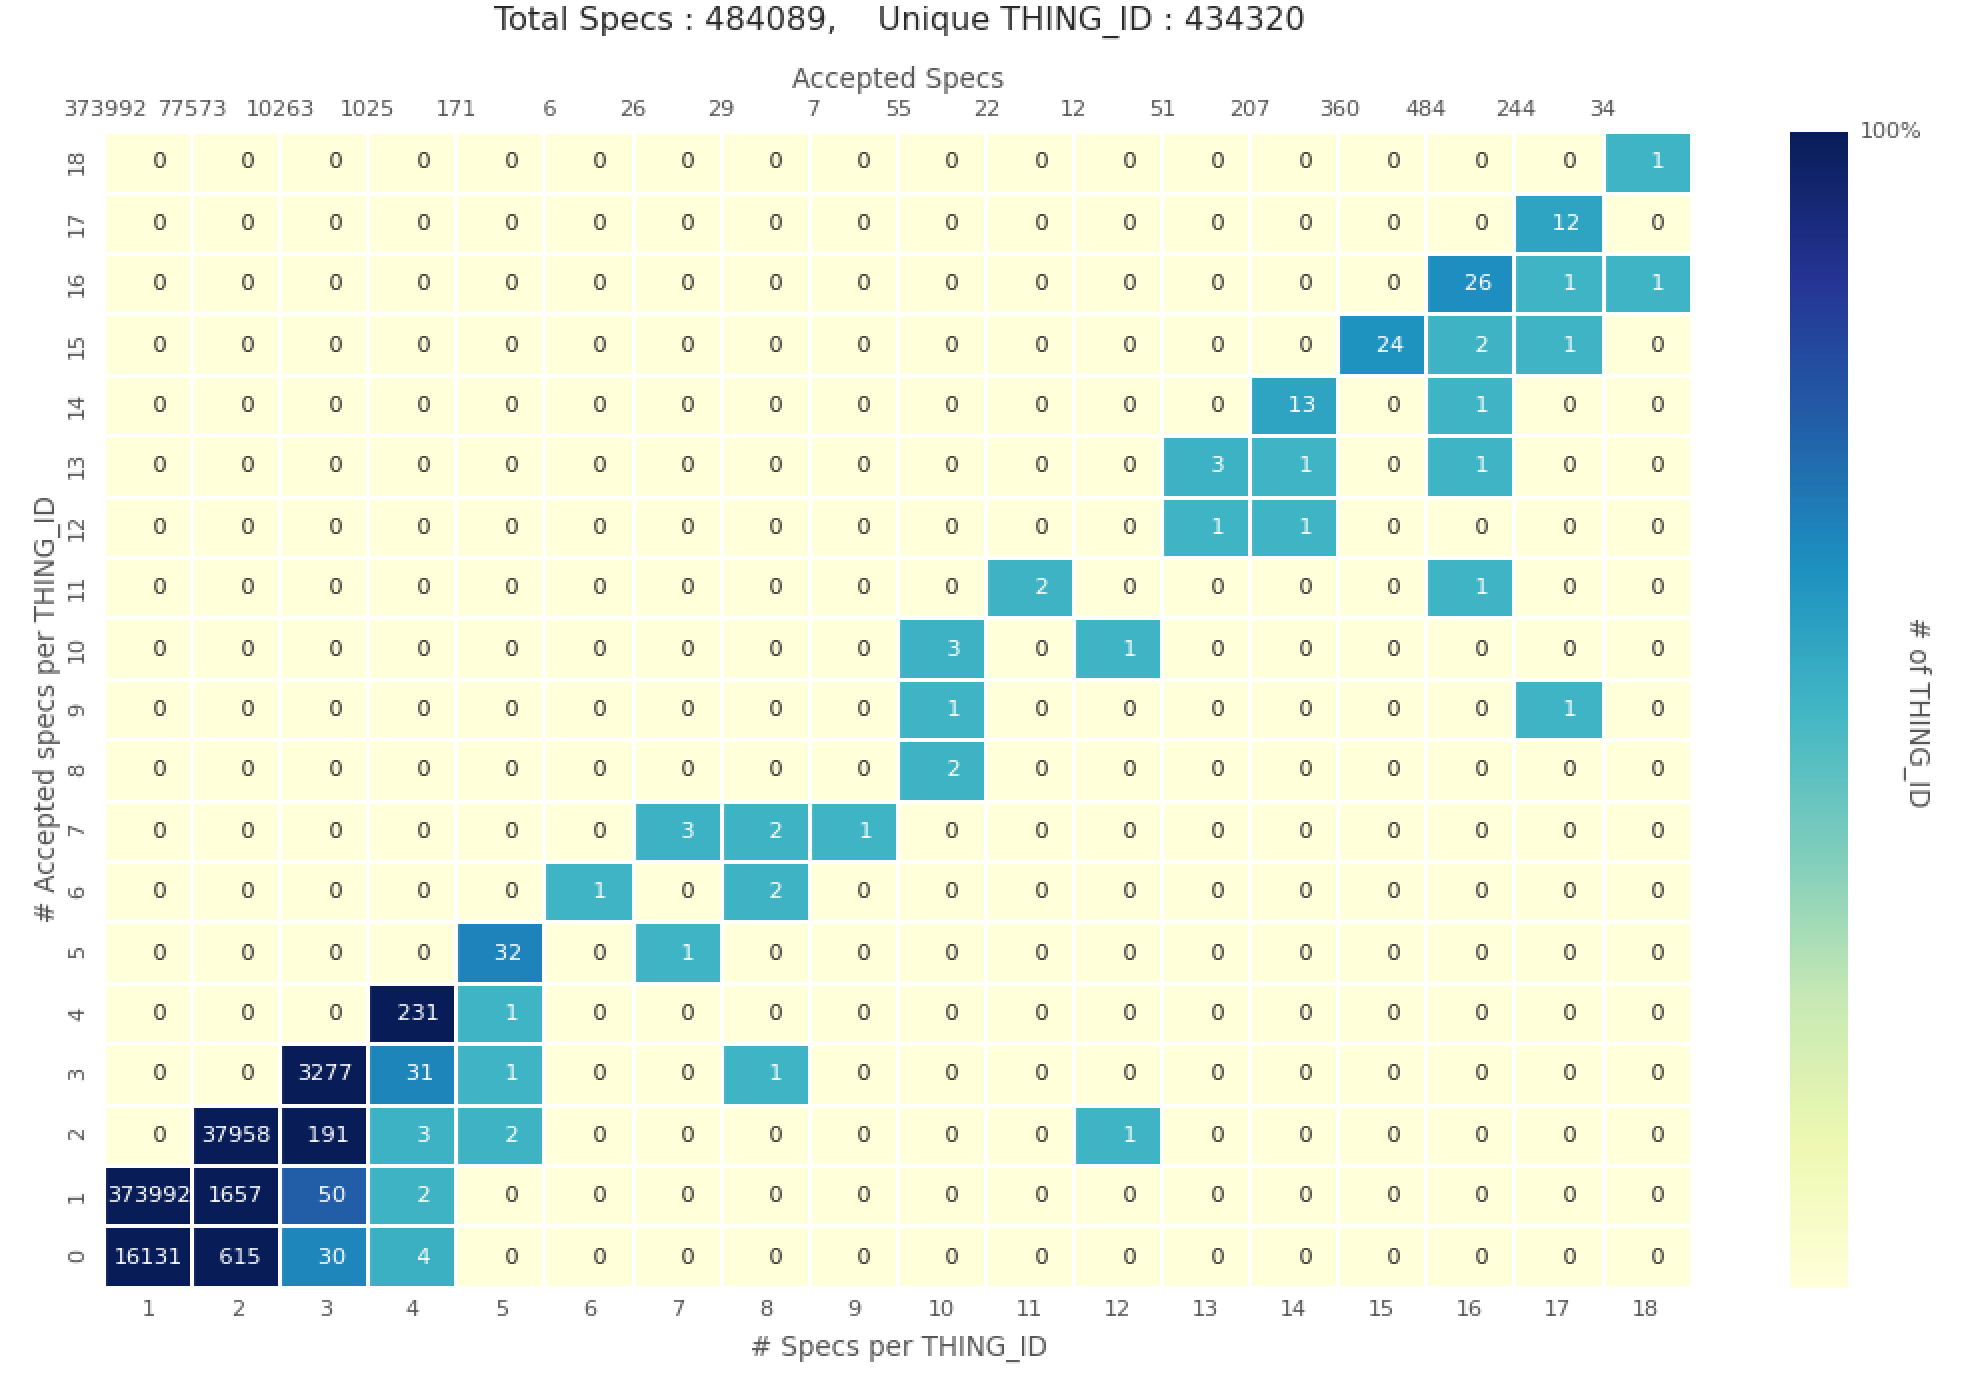

In [192]:
Image("data/dist.jpg")

Exercise
Compute the decimals of Pi using the Wallis formula:

  $\pi =  2 \Pi_1^\infty \frac{4i^2}{4i^2-1}$
  
Hacer funcion factorial 
  